# Notebook 1

These two lines add the source folder to the path. These lines are specific to these notebooks and are not required in the example .py files.

In [1]:
# Importing the libraries -- You should NOT need to change this.
import sys,os
sys.path.append('source')
from skimage.io import imread
import matplotlib.pyplot as plt
from source.apd import *


/Users/munsky/Dropbox/My Mac (ETSs-MacBook-Pro.local)/Documents/GitHub/MicroscopyControlAndProcessing/venv/lib/python3.11/site-packages/docstring_inheritance/docstring_inheritors/bases/inheritor.py:329: DocstringInheritanceWarning: File /Users/munsky/Dropbox/My Mac (ETSs-MacBook-Pro.local)/Documents/GitHub/MicroscopyControlAndProcessing/venv/lib/python3.11/site-packages/pycromanager/acquisitions.py:698: in XYTiledAcquisition.__init__: section Parameters: the docstring for the argument 'tile_overlap' is missing.
  self._warn(
/Users/munsky/Dropbox/My Mac (ETSs-MacBook-Pro.local)/Documents/GitHub/MicroscopyControlAndProcessing/venv/lib/python3.11/site-packages/docstring_inheritance/docstring_inheritors/bases/inheritor.py:329: DocstringInheritanceWarning: File /Users/munsky/Dropbox/My Mac (ETSs-MacBook-Pro.local)/Documents/GitHub/MicroscopyControlAndProcessing/venv/lib/python3.11/site-packages/pycromanager/acquisitions.py:698: in XYTiledAcquisition.__init__: section Parameters: the docstr

## **Example 1.1**: Getting Started

Taking a singular image
Run MicroManager and open port 4845 in the Options setting.
Run an the acquisition of a single image at the origin [0,0] by taking a grid of images with no steps.

* **myConfig.cfg** : An empty configuration plain text file for demo use

* **rootDataFolder** : The location of the program home folder. Pointing this to a different locaiton will cause saving to that folder.

* **positions** : A list of (x,y) float or int pairs

AcqusitionPluginLibrary creates differnt types of acquistisions depending on the function used (Factory Design Pattern).

AcqusitionPluginLibrary.xySequence(posittions) takes in at least a list of (x,y) positions, and returns an AcquisitionPlugin which cotains a wad of settings to image a sequence of (x,y) positions.

Aquisition was completed and saved at /Users/munsky/Dropbox/My Mac (ETSs-MacBook-Pro.local)/Documents/GitHub/MicroscopyControlAndProcessing/data/users/default/acquisition/xySequence_18/
Image has size (2, 512, 512)
Slicing to last two dimensions


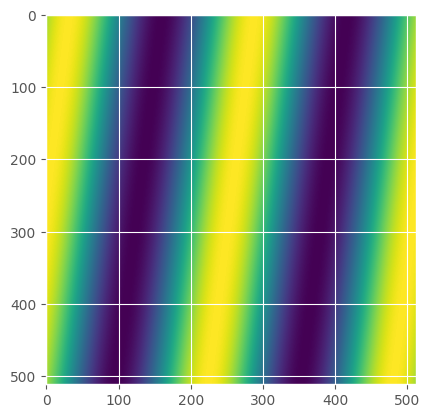

In [7]:
apdSystem = APDSystem(configFileName='myConfig.cfg', rootDataFolder='') #local
lib = AcquisitionPluginLibrary()
positions=[[0,0],[1,0]] #a list of length 1 which will use the origin [0,0] only
acquisition = lib.xySequence(positions)
dataset=apdSystem.acquire(acquisition)
print(f'Aquisition was completed and saved at {dataset.path}')
viewAcquisition(dataset)

## Example 1.2: Add a Z-Stack 
Taking Stacks of images in the Z-Direction is often of interest. This can be performed by passing a the Z Range Keyword arguement which is a triplet of values given by : 
 
* **zRange** = [ **zStart** , **zEnd** , **zStepSize** ]
* **xStart** : The starting point of the Z-Stack
* **ZEnd** : The final point of the Z-Stack
* **ZStepStize** : The step size beween stacks.

A Z-Range of [-1.,1.,0.5] would return the individual Z positions [-1.0,-0.5,0.0,0.5,1.0].

Aquisition was completed and saved at /Users/munsky/Dropbox/My Mac (ETSs-MacBook-Pro.local)/Documents/GitHub/MicroscopyControlAndProcessing/data/users/default/acquisition/xySequence_19/
Image has size (5, 512, 512)
Slicing to last two dimensions


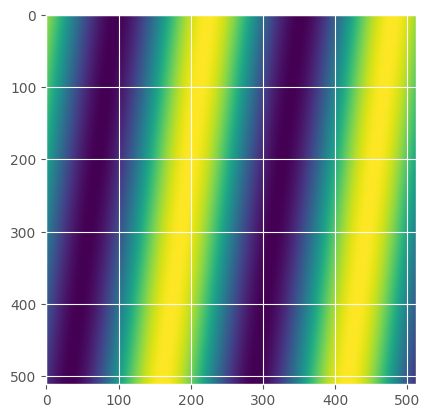

In [8]:
apdSystem = APDSystem(configFileName='myConfig.cfg', rootDataFolder='') #local
lib = AcquisitionPluginLibrary()
positions=[[0,0]]
zRange=[-1.,1.,.5]
acquisition = lib.xySequence(positions,zRange=[-1.,1.,.5])
dataset=apdSystem.acquire(acquisition)
print(f'Aquisition was completed and saved at {dataset.path}')
viewAcquisition(dataset)

## Example 1.3: Add a Time Range 
Make A time Series of the Z Stacks by adding the time sereies keyword arguement

* **timeRange**=[numTimePoints,timeInterval_Seconds]



Aquisition was completed and saved at /Users/munsky/Dropbox/My Mac (ETSs-MacBook-Pro.local)/Documents/GitHub/MicroscopyControlAndProcessing/data/users/default/acquisition/xySequence_20/
Image has size (3, 5, 512, 512)
Slicing to last two dimensions


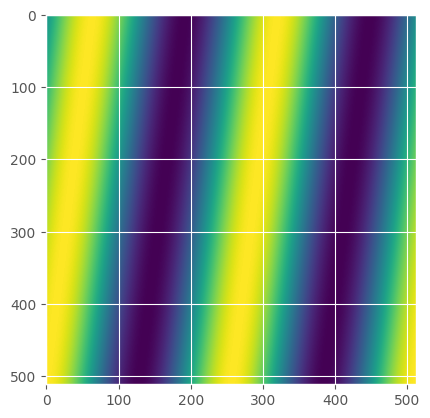

In [9]:
apdSystem = APDSystem(configFileName='myConfig.cfg', rootDataFolder='')
lib = AcquisitionPluginLibrary()
positions=[[0,0]]
acquisition = lib.xySequence(positions,zRange=[-1.,1.,.5],timeRange=[3,3.5])
dataset=apdSystem.acquire(acquisition)
print(f'Aquisition was completed and saved at {dataset.path}')
viewAcquisition(dataset)

## Example 1.4: Add another position to image

Image a nearby position by adding a position to the sequence by including annother (x,y) pair in the list of positions.


Aquisition was completed and saved at /Users/munsky/Dropbox/My Mac (ETSs-MacBook-Pro.local)/Documents/GitHub/MicroscopyControlAndProcessing/data/users/default/acquisition/xySequence_16/
Image has size (3, 2, 5, 512, 512)
Slicing to last two dimensions


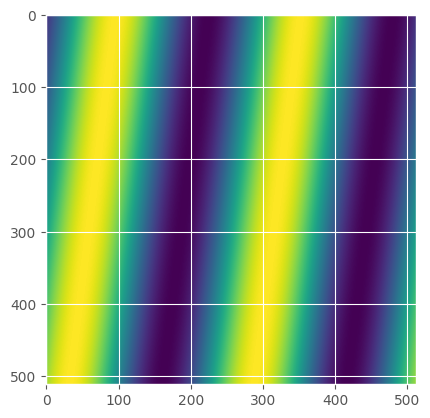

In [5]:
from source.apd import *
apdSystem = APDSystem(configFileName='myConfig.cfg', rootDataFolder='') #local
lib = AcquisitionPluginLibrary()
positions=[[0,0],[0,50]]
acquisition = lib.xySequence(positions,zRange=[-1.,1.,.5],timeRange=[3,3.5])
dataset=apdSystem.acquire(acquisition)
print(f'Aquisition was completed and saved at {dataset.path}')
viewAcquisition(dataset)

## Example 1.5: Image in multiple colors by adding an optional channelRange arguement
Multi-Color images can be taken by changing the ChannelRange of the system:

* **channelRange** = [ **ChannelName** , **ChannelNameItemsList** , **channelExposureTimeMS**]
    * channelName : a string of the type of 'state' to increment over
    * channelNameItemsList : list of items to change to
    * channelExposureTimeList_MS: list of channel exposure times in milliseconds which is equal in length to the items names.

Aquisition was completed and saved at /Users/munsky/Dropbox/My Mac (ETSs-MacBook-Pro.local)/Documents/GitHub/MicroscopyControlAndProcessing/data/users/default/acquisition/xySequence_17/
Image has size (3, 2, 5, 2, 512, 512)
Slicing to last two dimensions


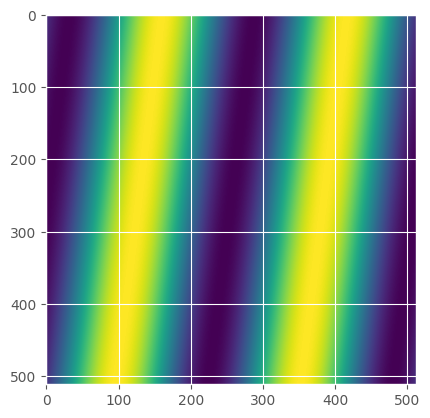

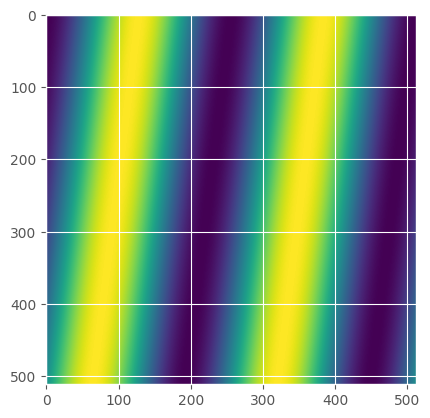

In [6]:
from source.apd import *
apdSystem = APDSystem(configFileName='myConfig.cfg', rootDataFolder='') #local
lib = AcquisitionPluginLibrary()
positions=[[0,0],[0,50]]
acquisition = lib.xySequence(positions,zRange=[-1.,1.,.5],timeRange=[3,3.5],channelRange=['Channel',['DAPI','Cy5'],[100,100]])
dataset=apdSystem.acquire(acquisition)
print(f'Aquisition was completed and saved at {dataset.path}')
viewAcquisition(dataset,color=True)